In [3]:
name = "****"
id = 123456

In [4]:
# Select the data file based on your student ID
n = id % 5 # Take the modulo 5 of your student ID
num_list = [3, 4, 6, 8, 9] # List of numbers to select from
filename = f'./data/bidmc_{num_list[n]:02d}_Signals.csv'
print(f'Filename: {filename}')

Filename: ./data/bidmc_09_Signals.csv


In [1]:
# Run if needed
!pip install numpy pandas matplotlib scipy

In [17]:
# Read necessary libraries and functions
import numpy as np                  # for numerical operations
import matplotlib.pyplot as plt     # for plotting
import pandas as pd                 # for reading data
from scipy.signal import find_peaks, peak_prominences  # for peak detection
import os                   
# for file operations

In [18]:
# Print the list of files in the ./data directory
os.listdir('./data')

['bidmc_09_Fix.txt', 'bidmc_09_Signals.csv', 'HT_A2_familyname.py']

>## 💡 **Interpretation**: 

### **T -- period; f -- frequency, 250Hz**
### **T = 1 / f**
### **peak-to-peak interval -- PPI. PPI = n * ts (in ms), n = the number of samples (n); the sampling interval (ts)**
### **HR = 60 / (PPI / 1000) (in bpm)**

In [19]:
# Read the data
data = pd.read_csv(filename)

# Get PPG signal and create time vector
ppg = data[' PLETH']
ts = 0.008 # Sample time in seconds
fs = 1/ts # Sample rate (Hz), samples per second
t = np.arange(len(ppg))*ts

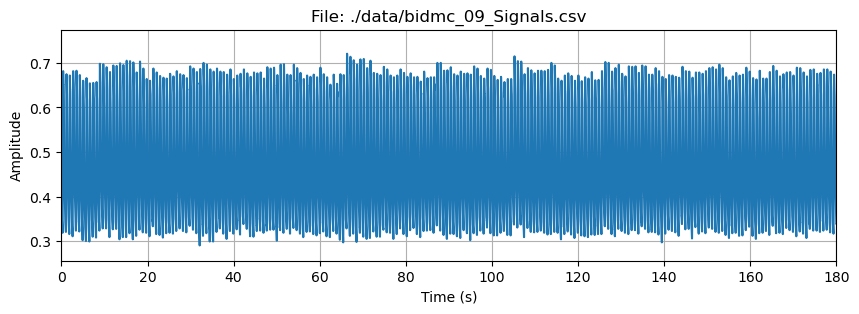

In [20]:
# Plot 180 seconds of the full signal
plt.figure(figsize = (10, 3))
plt.plot(t, ppg)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title(f'File: {filename}')
plt.xlim(0, 180)
plt.grid()
plt.show()

[0.00000e+00 8.00000e-03 1.60000e-02 ... 4.79984e+02 4.79992e+02
 4.80000e+02]


(4.0, 18.0)

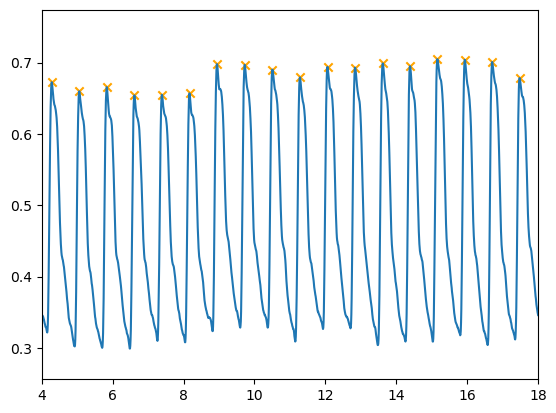

In [21]:
peaks, _ = find_peaks(ppg, height=0.5)
ppi_in_ms = []
peaks_in_ms = peaks/fs *1000
print(t)

plt.plot(t, ppg)
plt.scatter(t[peaks], ppg[peaks], marker="x", color="orange")
plt.xlim(4, 18)

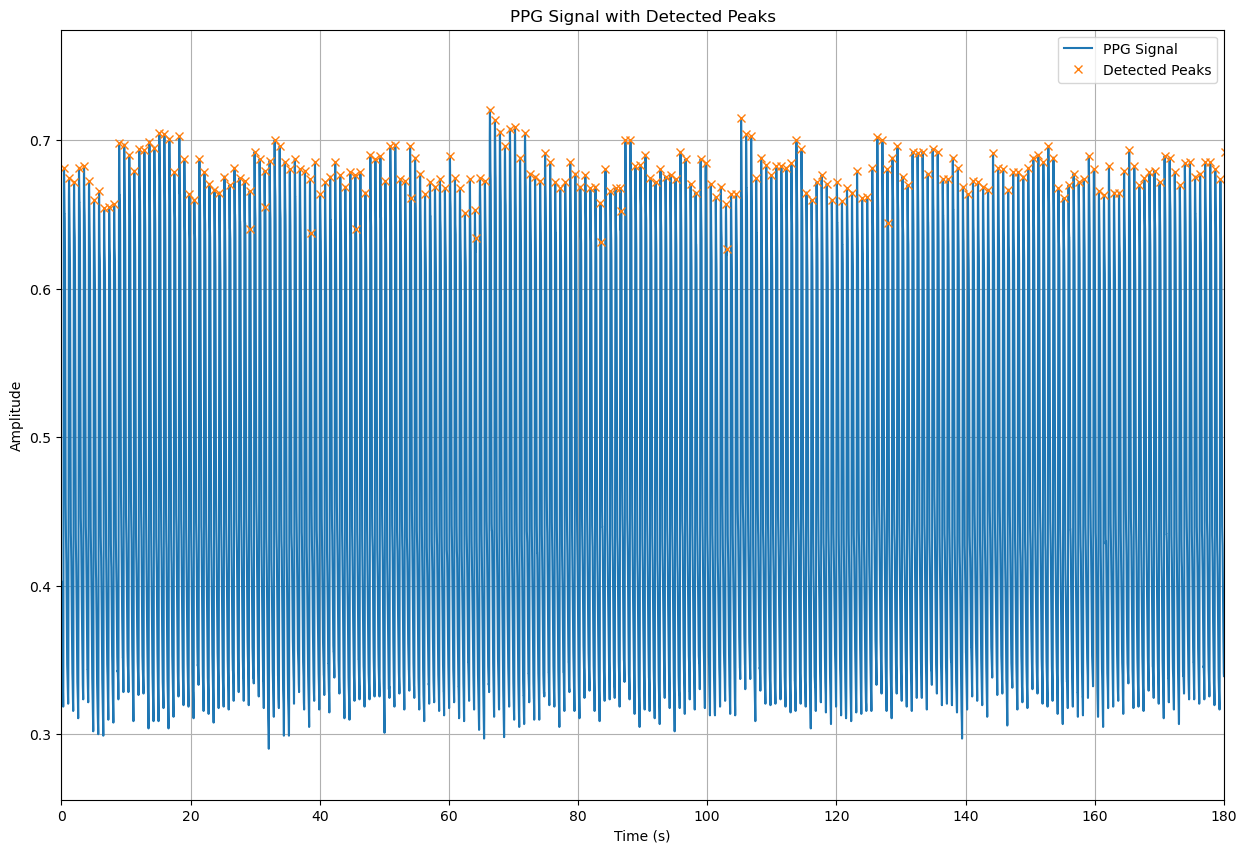

Mean Heart Rate: 79.29 bpm
Mean SDNN: 122.78 ms
Mean RMSSD: 165.07 ms
Mean PPI: 756.73 ms


In [24]:
# Continue coding here ...

peaks, _ = find_peaks(ppg, height=0.5)
prominence = peak_prominences(ppg, peaks)

plt.figure(figsize=(15, 10)) 
plt.plot(t, ppg, label='PPG Signal')
np.diff(peaks)
plt.plot(t[peaks], ppg[peaks], "x", label='Detected Peaks') 
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.xlim(0, 180)
plt.title('PPG Signal with Detected Peaks')
plt.legend()
plt.grid(True)
plt.show()

peak_times = peaks / fs  
pp_intervals = np.diff(peak_times) * 1000


mean_ppi = np.mean(pp_intervals)
heart_rate = 60000 / mean_ppi
mean_hr = np.mean(heart_rate)
sdnn = np.std(pp_intervals)
rmssd = np.sqrt(np.mean(np.diff(pp_intervals) ** 2))
    
print(f"Mean Heart Rate: {mean_hr:.2f} bpm")
print(f"Mean SDNN: {sdnn:.2f} ms")
print(f"Mean RMSSD: {rmssd:.2f} ms")
print(f"Mean PPI: {mean_ppi:.2f} ms")




In [25]:
# Remember to add your interpretations ..
# 1. Was the mean heart rate (in BPM) low or high?
# high
# 2. Was the mean PPI (in milliseconds) low or high?
# high
# 3. How much variation was there in the PPI values (standard deviation and/or root-mean-square value of successive intervals)?
# Mean SDNN: 122.78 ms
# 4. Was the variation low or high?
# high
# 5. Compare these values to the given normal value
    
#Mean Heart Rate (79.29 bpm): This value is above the normal range for resting heart rate (50-70 bpm). 
# Mean SDNN (122.78 ms): the normal range provided (30.6 ± 12.4 ms) is considerably lower than the value of 122.78 ms. This suggests unusually high heart rate variability. 
# Mean RMSSD (165.07 ms): the normal range (female 95): 3.06. 165.07 ms is a notably high value.
# Mean PPI (756.73 ms): The value here doesn't contradict the other indicators.
